# Demo session: Applications of H SAF products, including tools for downloading, processing and visualization of data
## Flood modelling with satellite rainfall data in Africa
## Christian Massari and Sara Modanesi

# Impact of precipitation input on river discharge simulation

The exercise is divided in four different steps:
1) We will calibrate the MILc rainfall-runoff model (lumped version of the MISDc) over a basin in Africa using the GPCC rainfall product. For the calibration we will use the Particle Swarm Optimization algorithm, optimizing the KGE.
2) We will run the MILc over the basin using the calibrated parameters with GPCC and different rainfall products as inputs;
3) We will calibrate the model using the different rainfall products;
4) The model will run again using the calibrated parameters and the best performing rainfall product will be identified.

In particular, rainfall products used will be: 
* -GPCC Global Precipitation Climatology Centre product for the initial calibration;
* -ERA-5 reanlysis product;
* -SM2RAIN product;
* -GPM Global Precipitation Measurement product;
* -H64 product;
* -H23 product.

All the data are stored in different text files and are named considering the different rainfall products.

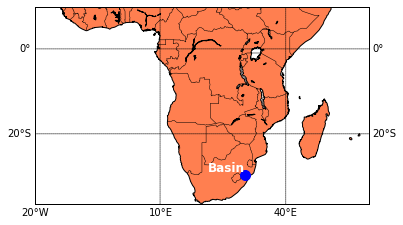


### Import the necessary python libraries

In [2]:
from MILc_2 import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history

### Plot Africa basin

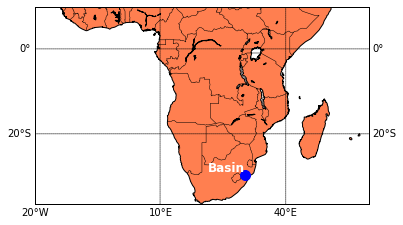

In [5]:
map = Basemap(llcrnrlon=-20.,llcrnrlat=-35.,urcrnrlon=60.,urcrnrlat=10.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc')
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
# draw parallels
map.drawparallels(np.arange(-40,10,20),labels=[1,1,0,1])
# draw meridians
map.drawmeridians(np.arange(-20,60,30),labels=[1,1,0,1])

#lonlat of the basin
lon = 30.3318
lat = -29.0799
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=10)
label = 'Basin'
plt.text(x, y, label,color='white',
                fontsize="large", weight='heavy',
                horizontalalignment='right',
                verticalalignment='bottom')

plt.show()

## STEP1: calibration of the MILc rainfall-runoff model (lumped version of the MISDc) over a basin in Africa using the GPCC rainfall product

2022-01-17 09:42:52,990 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████|20/20, best_cost=0.275
2022-01-17 09:43:00,496 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.27507541530028545, best pos: [5.26812965e-01 6.50287668e+02 6.91735318e+00 3.42808242e+00
 2.97415779e-01 2.87301998e+00 1.10220143e+00 5.01860894e+00]


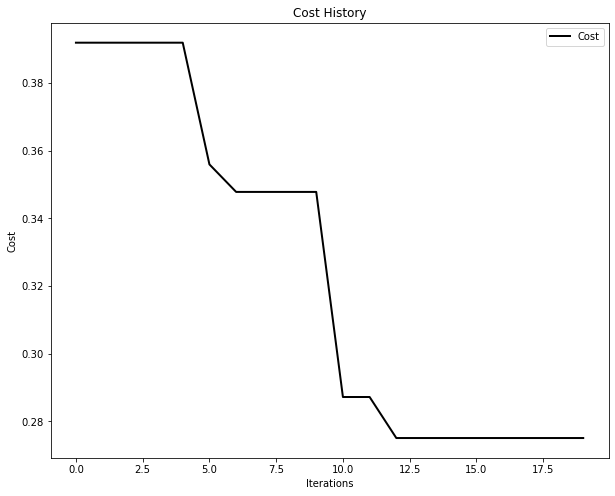

In [3]:
name1='AFRICA_GPCC_2011_14'
data_input1=pd.read_csv(name1+'.txt',index_col=0,header = None, names = ['P','T','Q'],sep=',',parse_dates=True)
Ab=340 #area of the basin

#Define objective function func
def func(PARv):
    #global d_input, Ab
    n_particles = PARv.shape[0]
    err = np.zeros(n_particles)
    for i in range(n_particles):
        KGE,data=MILC(name,d_input,PARv[i],Ab,Wobs=[],K=0,fig=0)
        err[i] = 1 - KGE
    return err

#Parameters are (in the following order):
#1) Initial conditions, fraction of W_max (0-1);
#2) Field capacity;
#3) Exponent of drainage;
#4) Parameter of infiltration and drainage;
#5) Fraction of drainage verusu interflow;
#6) Coefficient lag-time relationship;
#7) Parameter of potential evapotranspiration;
#8) Runoff exponent.

#PSO needs defined parameters boundaries. 
bnds1 = (np.array([0, 200, 1, 0,
                          0, 0.5, 1, 1]),
                np.array([1, 1000, 10, 5,
                          1, 3, 2, 15]))
#PSO needs defined options
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

#Call instance of PSO with bounds argument
name=name1 #variables renamed to be used in the objective function
d_input=data_input1 #input from GPCC becomes the input for the objective function
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=8, options=options, bounds=bnds1)
cost, pos = optimizer.optimize(func, 20)

#Obtain cost history from optimizer instance
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
PARn = pos
np.savetxt('X_opt_' + name+'.txt', PARn) #save parameters calibrated for GPCC input

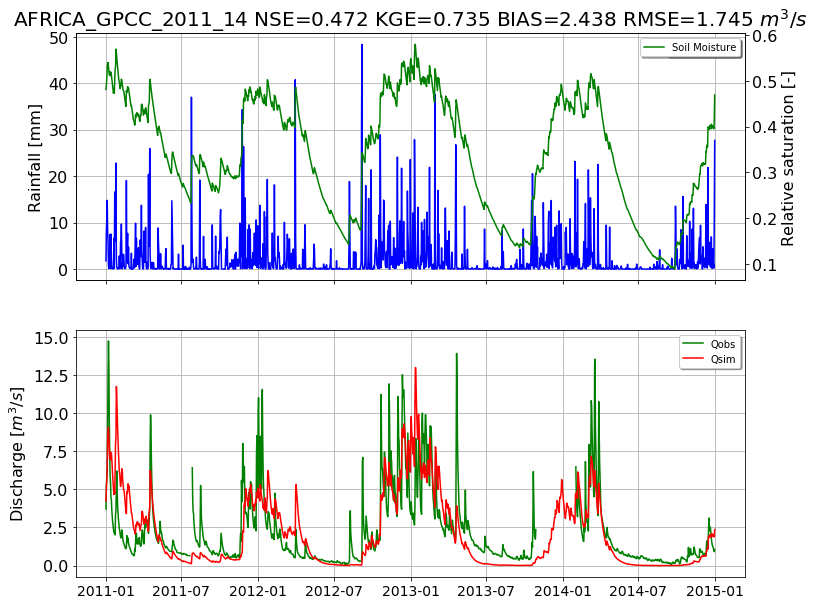

In [7]:
PAR=np.loadtxt('X_opt_' + name1+'.txt') #Calibrated parameters with GPCC input
QobsQsim,data=MILC(name1,data_input1,PAR,Ab,fig=1)

The figure shows, in the upper plot, relative saturation and rainfall. In the bottom plot the temporal comparison between observed and simulated river discharge is shown. The scores are displayed in the title. We obtain a satisfactory KGE of 0.73 with the calibrated parameters considering the entire calibration period 

## STEP2: running the rainfall-runoff model with GPCC-calibrated parameters considering different precipitation inputs

### Model run using GPCC-calibrated parameters and input precipitation from ERA-5 rainfall dataset

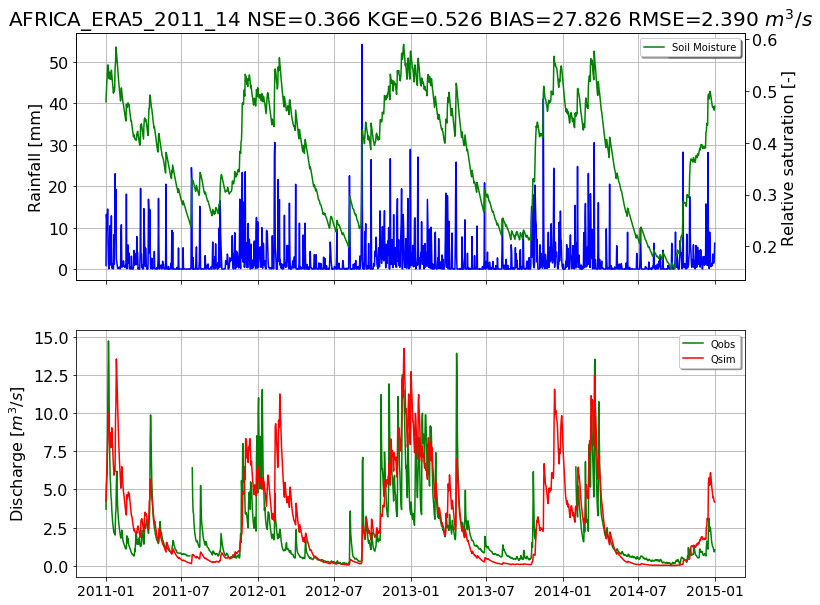

In [8]:
name2='AFRICA_ERA5_2011_14'
data_input2=pd.read_csv(name2+'.txt',index_col=0,header = None, names = ['P','T','Q'],sep=',',parse_dates=True)

QobsQsim,data=MILC(name2,data_input2,PAR,Ab,fig=1) #Parameters have been calibrated using GPCC

In the bottom plot we obtain a KGE of 0.5 between observed and simulated river discharge using the parameters calibrated with GPCC. Performances are lower but acceptable 

### Model run using GPCC-calibrated parameters and input precipitation from SM2RAIN rainfall dataset

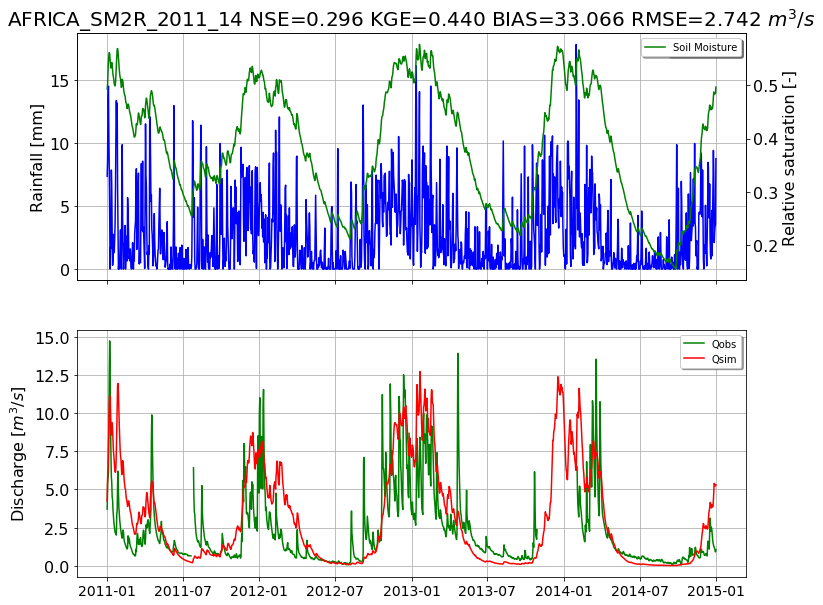

In [9]:
name3='AFRICA_SM2R_2011_14'
data_input3=pd.read_csv(name3+'.txt',index_col=0,header = None, names = ['P','T','Q'],sep=',',parse_dates=True)

QobsQsim,data=MILC(name3,data_input3,PAR,Ab,fig=1) #Parameters calibrated using GPCC

### Model run using GPCC-calibrated parameters and input precipitation from GPM rainfall dataset

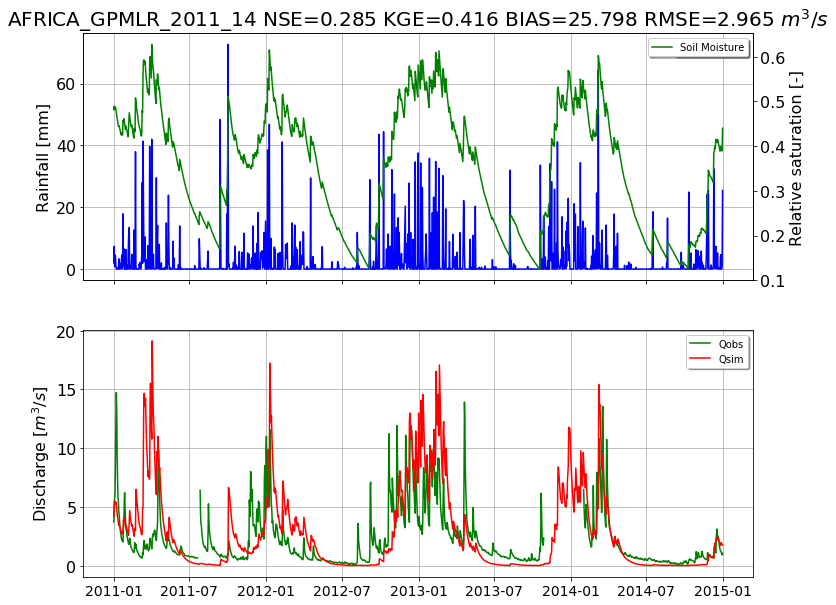

In [10]:
name4='AFRICA_GPMLR_2011_14'
data_input4=pd.read_csv(name4+'.txt',index_col=0,header = None, names = ['P','T','Q'],sep=',',parse_dates=True)

QobsQsim,data=MILC(name4,data_input4,PAR,Ab,fig=1)

### Model run using GPCC-calibrated parameters and input precipitation from H64 rainfall dataset

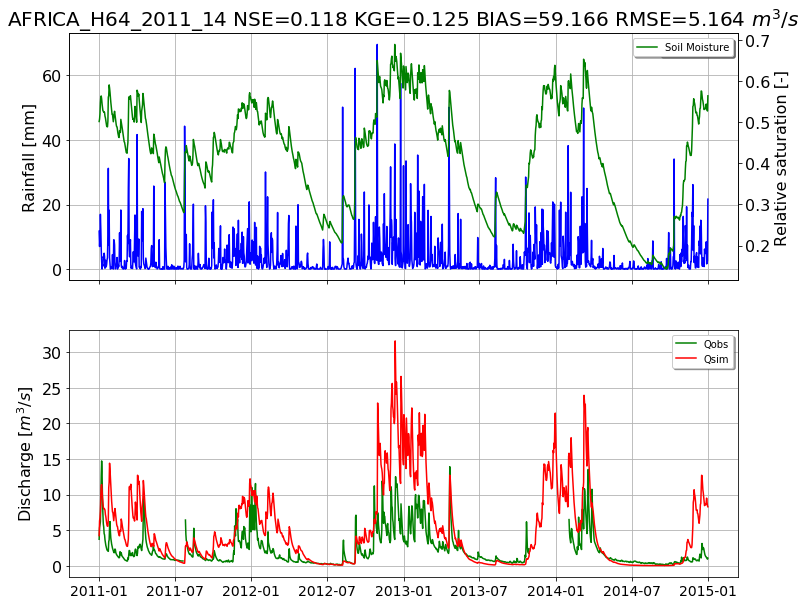

In [11]:
name5='AFRICA_H64_2011_14'
data_input5=pd.read_csv(name5+'.txt',index_col=0,header = None, names = ['P','T','Q'],sep=',',parse_dates=True)

QobsQsim,data=MILC(name5,data_input5,PAR,Ab,fig=1)

### Model run using GPCC-calibrated parameters and input precipitation from H23 rainfall dataset 

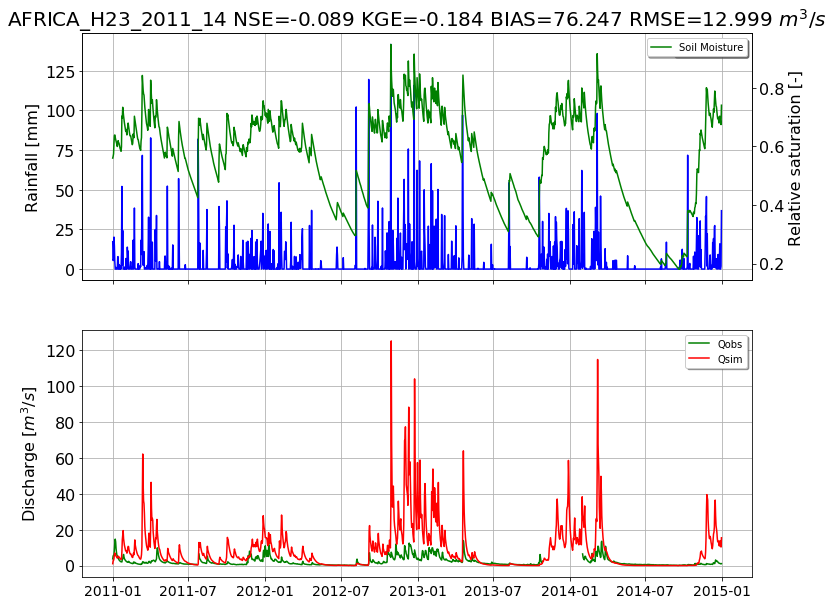

In [54]:
name6='AFRICA_H23_2011_14'
data_input6=pd.read_csv(name6+'.txt',index_col=0,header = None, names = ['P','T','Q'],sep=',',parse_dates=True)

QobsQsim,data=MILC(name6,data_input6,PAR,Ab,fig=1)

The H23 product shows the lower performances compared with the previous products using the GPCC calibrated parameters 

## STEP3: calibration of model parameters considering different rainfall inputs

### Calibration using ERA-5 rainfall dataset

2020-12-14 13:43:41,519 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.328
2020-12-14 13:43:48,976 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.32797303645220177, best pos: [5.69155382e-01 4.95550004e+02 6.88662909e+00 3.48297536e+00
 3.05577854e-01 9.33926565e-01 1.54555747e+00 9.97978914e+00]


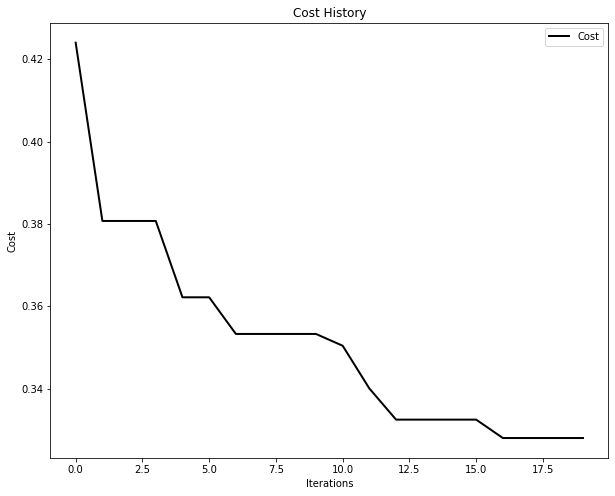

In [55]:
#The objective function and pso options have been previously defined

#Call instance of PSO with bounds argument
name=name2
d_input=data_input2 #input from ERA-5 becomes the input for the objective function
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=8, options=options, bounds=bnds1)
cost, pos = optimizer.optimize(func, 20)

#Obtain cost history from optimizer instance
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
PARn = pos
np.savetxt('X_opt_' + name+'.txt', PARn) #save parameters calibrated for ERA-5 input

### Calibration using SM2RAIN rainfall dataset

2020-12-14 13:43:58,536 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.358
2020-12-14 13:44:05,965 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3575642821000986, best pos: [5.65167834e-01 5.10810440e+02 5.30531580e+00 2.53605903e+00
 3.68799729e-01 7.59674944e-01 1.76968691e+00 8.97142907e+00]


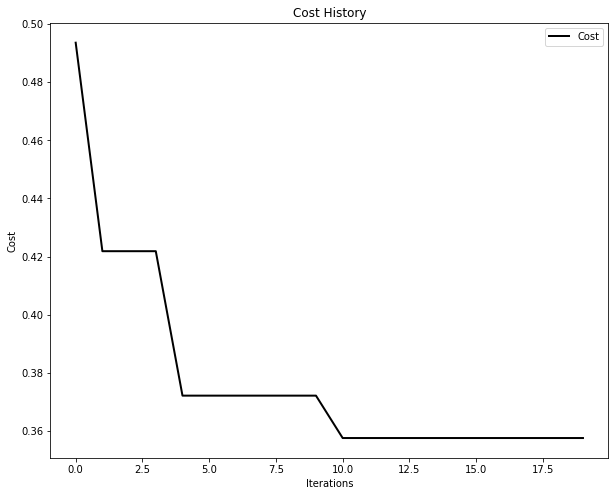

In [56]:
#The objective function and pso options have been previously defined

#Call instance of PSO with bounds argument
name=name3
d_input=data_input3 #input from SM2RAIN becomes the input for the objective function
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=8, options=options, bounds=bnds1)
cost, pos = optimizer.optimize(func, 20)

#Obtain cost history from optimizer instance
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
PARn = pos
np.savetxt('X_opt_' + name+'.txt', PARn) #save parameters calibrated for SM2RAIN input

### Calibration using GPM rainfall dataset

2020-12-14 13:44:10,732 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.401
2020-12-14 13:44:18,087 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4009775540871736, best pos: [5.34552733e-01 5.81149516e+02 4.79755717e+00 3.67525385e+00
 3.74694301e-01 2.05547721e+00 1.87979672e+00 1.19044244e+01]


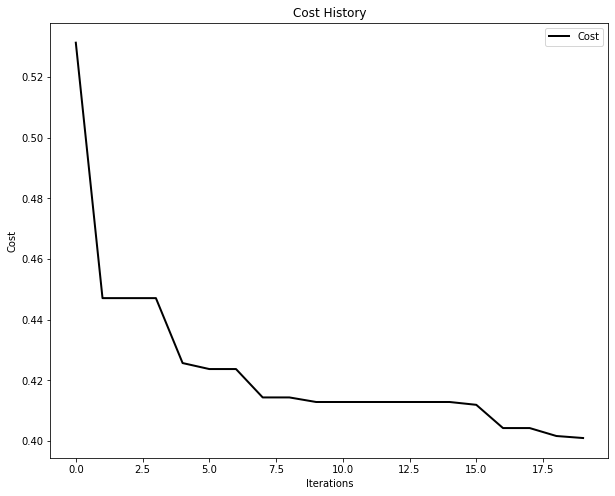

In [57]:
#The objective function and pso options have been previously defined

#Call instance of PSO with bounds argument
name=name4
d_input=data_input4 #input from GPM becomes the input for the objective function
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=8, options=options, bounds=bnds1)
cost, pos = optimizer.optimize(func, 20)

#Obtain cost history from optimizer instance
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
PARn = pos
np.savetxt('X_opt_' + name+'.txt', PARn) #save parameters calibrated for GPM input

### Calibration using H64 rainfall dataset

2020-12-14 13:44:21,575 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.29
2020-12-14 13:44:29,087 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.29036561498192737, best pos: [  0.74287397 475.79015964   4.8070413    0.92363255   0.61909231
   1.48031472   1.72103299  11.67799785]


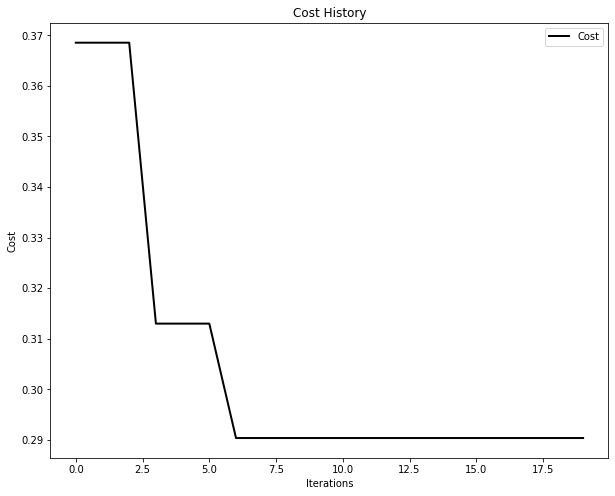

In [58]:
#The objective function and pso options have been previously defined

#Call instance of PSO with bounds argument
name=name5
d_input=data_input5 #input from H64 becomes the input for the objective function
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=8, options=options, bounds=bnds1)
cost, pos = optimizer.optimize(func, 20)

#Obtain cost history from optimizer instance
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
PARn = pos
np.savetxt('X_opt_' + name+'.txt', PARn) #save parameters calibrated for H64 input

### Calibration using H23 rainfall dataset 

2020-12-14 13:44:32,881 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.31 
2020-12-14 13:44:40,368 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.31038750638811863, best pos: [5.74298116e-01 6.37159585e+02 3.69058140e+00 3.17898072e+00
 8.01222580e-01 2.17623881e+00 1.94980558e+00 6.61537356e+00]


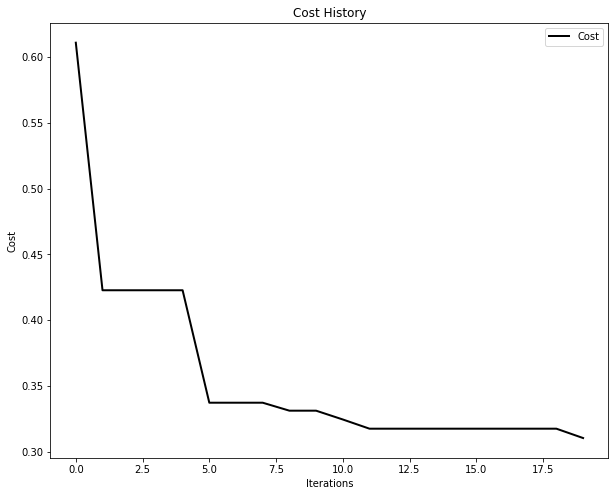

In [59]:
#The objective function and pso options have been previously defined

#Call instance of PSO with bounds argument
name=name6
d_input=data_input6 #input from H23 becomes the input for the objective function
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=8, options=options, bounds=bnds1)
cost, pos = optimizer.optimize(func, 20)

#Obtain cost history from optimizer instance
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
PARn = pos
np.savetxt('X_opt_' + name+'.txt', PARn) #save parameters calibrated for H23 input

## STEP4: running the rainfall-runoff model with calibrated parameters considering different rainfall inputs

### Model runs ERA-5 rainfall input and calibrated parameters

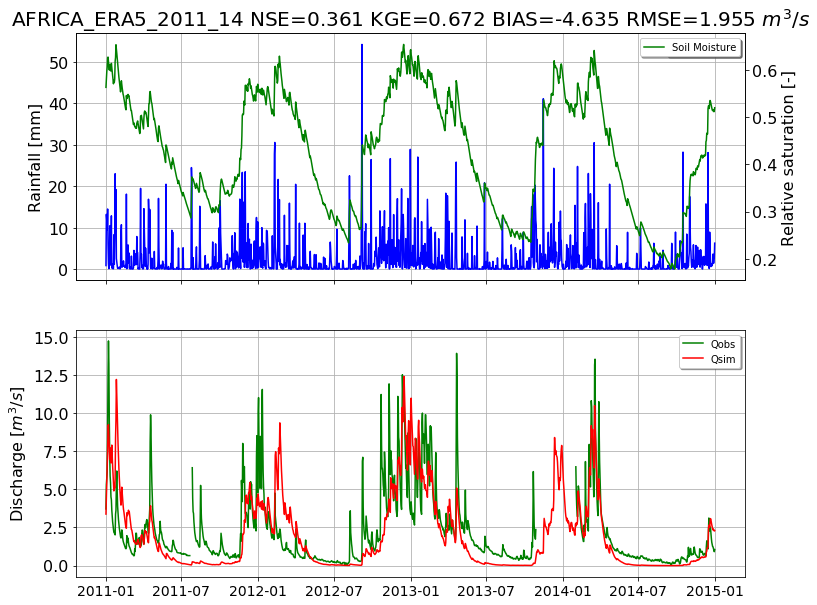

In [60]:
PAR2=np.loadtxt('X_opt_' + name2+'.txt') #Calibrated parameters with ERA-5 input
QobsQsim,data=MILC(name2,data_input2,PAR2,Ab,fig=1)

### Model runs SM2RAIN rainfall input and calibrated parameters

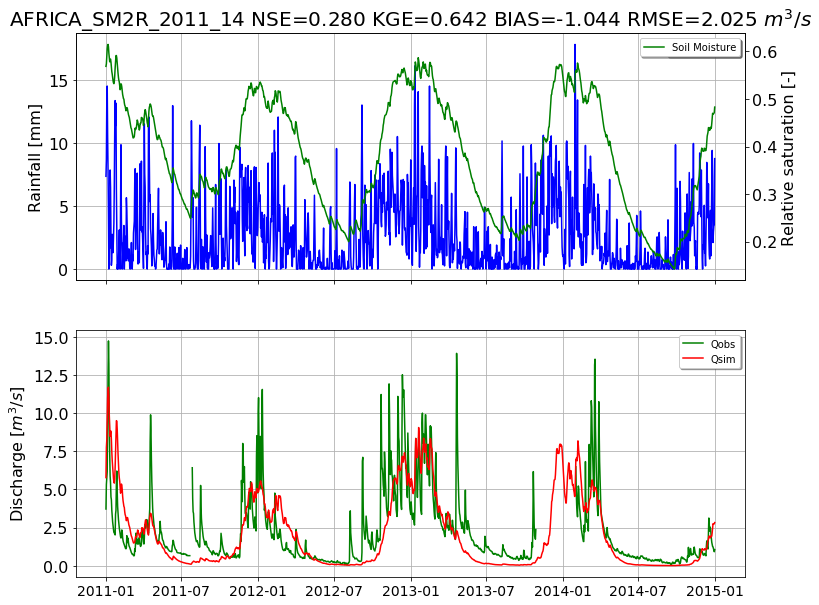

In [61]:
PAR3=np.loadtxt('X_opt_' + name3+'.txt') #Calibrated parameters with SM2RAIN input
QobsQsim,data=MILC(name3,data_input3,PAR3,Ab,fig=1)

### Model runs GPM rainfall input and calibrated parameters  

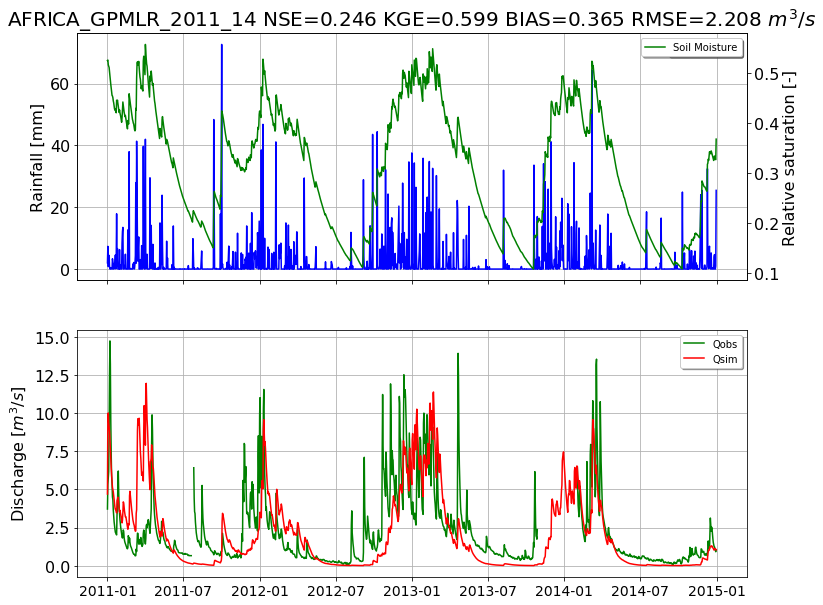

In [62]:
PAR4=np.loadtxt('X_opt_' + name4+'.txt') #Calibrated parameters with GPM input
QobsQsim,data=MILC(name4,data_input4,PAR4,Ab,fig=1)

### Model runs H64 rainfall input and calibrated parameters 

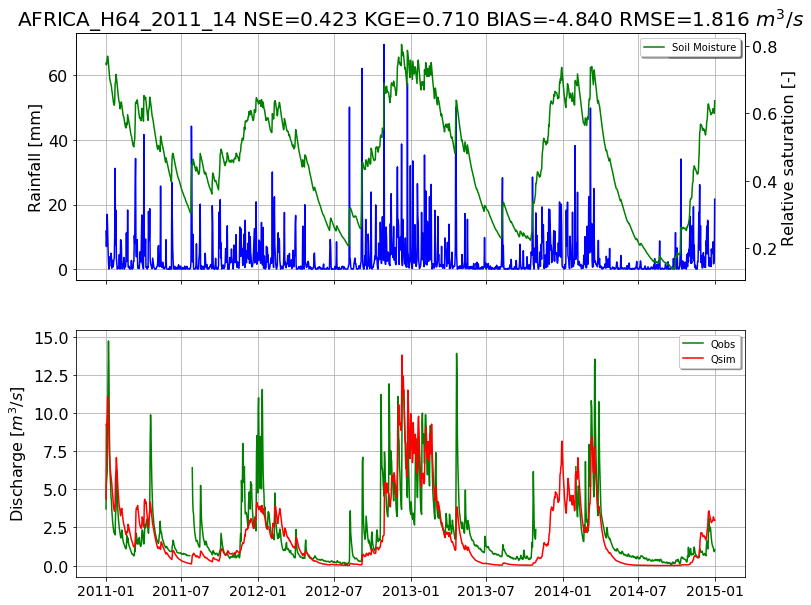

In [63]:
PAR5=np.loadtxt('X_opt_' + name5+'.txt') #Calibrated parameters with GPM input
QobsQsim,data=MILC(name5,data_input5,PAR5,Ab,fig=1)

### Model runs H23 rainfall input and calibrated parameters

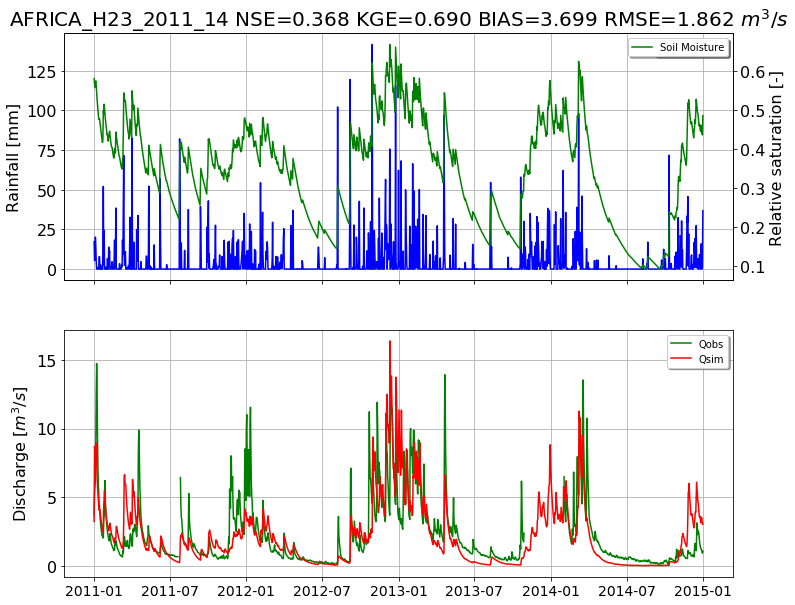

In [64]:
PAR6=np.loadtxt('X_opt_' + name6+'.txt') #Calibrated parameters with GPM input
QobsQsim,data=MILC(name6,data_input6,PAR6,Ab,fig=1)

### Which is the product providing the best performance in terms of scores after parameters calibration? You can also compare the results with the previous calibration and run using the GPCC product

## Lab done!!!